# Simulation d'un modèle dynamique unidirectionnel

par Bruno DENIS

Modélisation et simulation de la vitesse d'un ballon dirigeable en translation horizontale (Ox) propulsé par une hélice mûe par un moteur électrique. 

L'objectif de la simulation est d'obtenir des informations utiles au dimensionnement de la propulsion longitudinale.

## Structure du système

Le système étudié est composé d'un ballon gonflé à l'hélium doté, pour sa propulsion, d'une chaine d'énergie formée par les constituants suivants :
- une batterie électrique (fonction alimenter)
- un ESC, contrôleur électronique de vitesse (fonction moduler)
- un moteur électrique (fonction transformer)
- un arbre moteur (fonction transmettre)
- une hélice (fonction agir)

La figure ci-dessous illustre la structure du système 

Deux modèles simulables du système sont proposés dans la suite.
- le modèle 1 porte sur uniquement sur le ballon et l'hélice dont la vitesse de rotation pourra être pilotée (imposée)
- le modèle 2 inclut le comportement du moteur et du contrôleur électronique de vitesse


## Modélisation avec une vitesse de rotation d'hélice constante

**Système isolé**

- dirigeable (enveloppe, nacelle, empennage, support de charge utile, hélium, objet transporté)

**Inventaires des actions mécaniques sur le système isolé (dirigeable)**
 
- Poids du dirigeable 
- Portance (Poussée d'Archimède)
- Efforts de propulsion
- Efforts aérodynamiques (frottement fluide)
    * Phénomènes stationnaires dus à la viscosité de l'air (efforts de trainée)
    * Phénomènes non stationnaires (effet dynamique du déplacement de l'air, non négligeable pour un dirigeable "plus léger que l'air")

**Hypothèses**

Efforts de propulsion et répartition des masses tels que le dirigeable se déplace horizontalement sans rotation 
- mouvement uniquement selon l'axe Ox, 
- angle d'attaque nul,
- vitesse de l'air est nulle par rapport au sol, c'est-à-dire pas de vent.

**Modélisation de la projection des actions mécaniques selon Ox**

- Poids du ballon selon Ox: $0$
- Portance selon Ox:  $0$
- Efforts de Propulsion selon Ox: $F_{prop/air}$
    * modèle pour une propulsion à une hélice $F_{prop/air} = \alpha\Omega_{hélice}^2 - \beta\Omega_{hélice}.V_{hélice/air}$ (modèle utilisé dans le logiciel de simulation [webot](http://www.cyberbotics.com), expliqué dans [Rochez 2020] et [Staples 2013], où
        + $\Omega_{hélice}$ est la vitesse de rotation de l'hélice
        + $V_{hélice/air}$ est la vitesse linéaire de l'hélice par rapport à l'air, si la vitesse de l'air par rapport au sol est nulle, alors $V_{hélice/air}$ est la vitesse du dirigeable par rapport au sol
        + $\alpha$ et $\beta$ sont deux coefficients caractéristiques de l'hélice, ces coeffients ne sont pas données par les constructeurs mais [Staples 2013] propose de les évaluer à partir du diamètre $d_{hélice}$ et du pas $p_{hélice}$ de l'hélice 
          * $\alpha = 1.6956 \times 10^{-9} \times d_{hélice}^{3.5} / \sqrt{p_{hélice}}$,
          * $\beta = 4.1944 \times 10^{-7} \times d_{hélice}^{3.5} / \sqrt{p_{hélice}}$ avec $d_{hélice}$ et $p_{hélice}$ en inches pour obtenir $F_{prop/air}$ en Newtons
- Efforts aérodynamiques stationnaires selon Ox: $F_{sta} = \frac{1}{2} \rho_{air} S_{ref} C_x V_{dirigeable/air}^2$ où 
    * $\rho_{air}$ désigne la masse volumique de l'air, 
    * $S_{ref}$ désigne la surface de référence, selon les auteurs c'est la surface de la section transversale maximale ou le volume du dirigeable à la puissance 2/3,
    * $C_x$ désigne le coefficient aérodynamique de trainée selon Ox, sans dimension, il dépend de la forme géométrique du dirigeable et de la position des gouvernes,
    * $ V_{dirigeable/air}$ vitesse linéaire du dirigeable par rapport à l'air
- Efforts aérodynamiques non stationnaires selon Ox (la masse d'air déplacée est appelée masse ajoutée ou masse virtuelle) [Bestaoui 2012], [Parrington 2021]
    * masse ajoutée pour un ellipsoïde de révolution de longueur $l_{dirigeable}$ et de rayon $r_{dirigeable}$ : $m_{ajoutée} = m_{air} \frac{\alpha_0}{2-\alpha_0}$ où
        + $m_{air} = \rho_{air}.V_{dirigeable/air}$ est la masse de l'air déplacer dépendant de $\rho_{air}$ la masse volumique de l'air et de 
        + $\alpha_0 = \frac{2(1-e^2)}{e^3} ( \frac{1}{2} ln ( \frac{1+e}{1-e} ) - e )$ avec $e^2 = 1 - \frac{r_{dirigeable}^2}{(l_{dirigeable}  / 2)^2}$

**Principe fondamental de la dynamique**

On notera $V_x$, la vitesse du dirigeable par rapport au sol, aussi égale à $V_{dirigeable/air}$, $V_{hélice/air}$ compte tenu de l'hypothèse d'une vitesse de l'air nulle par rapport au sol.

$$
\begin{array}{rcccc}
(m_{dirigeable} + m_{ajoutée}) dV_x(t)/dt &=& F_{prop}(t) &-& F_{sta}(t) \\
 &=& (\alpha\Omega_{hélice}^2 - \beta\Omega_{hélice}.V_x(t)) &-& (\frac{1}{2} \rho_{air} S_{ref} C_x V_x(t)^2) \\
\end{array}
$$

### Modèle 1 de la vitesse du dirigeable pour une vitesse constante de l'hélice

$$
\left\{
    \begin{array}{ccl}
        \frac{dV_x(t)}{dt} &=& - \frac{\rho_{air} S_{ref} C_x}{2(m_{dirigeable} + m_{ajoutée})}V_x(t)^2  - \frac{\beta\Omega_{hélice}}{m_{dirigeable} + m_{ajoutée}}V_x(t) + \frac{\alpha\Omega_{hélice}^2}{m_{dirigeable} + m_{ajoutée}} \\
        \frac{dP_x(t)}{dt} &=& V_x(t)
    \end{array}
\right. \;\;\; (1)
$$

le système équations différentielles ordinaires $(1)$ donne l'évolution temporelle des variables 
- $V_x(t)$ la vitesse longitudinale du dirigeable (m/s)
- $P_x(t)$ la position longitudinale du dirigeable (m)

en fonction les paramètres suivants
- $l_{dirigeable}$ la longueur de l'enveloppe ellipsoïde du dirigeable (m)
- $r_{dirigeable}$ le rayon de l'enveloppe ellipsoïde du dirigeable (m)
- $V_{dirigeable/air}$ le volume de l'enveloppe du dirigeable (m³)
- $m_{air}$ la masse du dirigeable, enveloppe et nacelle (kg)
- $\rho_{air}$ la masse volumique de l'air  (kg/m³)
- $C_x$ le coefficient aérodynamique de trainée (sans unité)
- $d_{hélice}$ le diamètre de l'hélice (in)
- $p_{hélice}$ le pas (pitch) de l'hélice (in)

et des paramètres suivants construits à partir des précédants
- $S_{ref} = \pi.r_{dirigeable}^2$ la surface de référence pour la trainée (m²)
- $m_{ajoutée} = m_{air} \frac{\alpha_0}{2-\alpha_0}$ la masse ajoutée pour tenir compte des efforts aérodynamiques non stationnaires (kg) où 
  - $\alpha_0 = \frac{2(1-e^2)}{e^3} ( \frac{1}{2} ln ( \frac{1+e}{1-e} ) - e )$ et 
  - $e^2 = 1 - \frac{r_{dirigeable}^2}{(l_{dirigeable}  / 2)^2}$
- $\alpha = 1.6956 \times 10^{-9} \times d_{hélice}^{3.5} / \sqrt{p_{hélice}}$ un coefficient du modèle de poussée (kg.m)
- $\beta = 4.1944 \times 10^{-7} \times d_{hélice}^{3.5} / \sqrt{p_{hélice}}$ un coefficient du modèle de poussée (kg)


In [1]:
# from IPython.display import display
import scipy
import pandas
import unidirectional_airship_simulation as uas

pandas.set_option('display.precision', 1)

### Simulation pour étudier l'influence de la vitesse de rotation de l'hélice sur la vitesse du dirigeable

Valeurs numériques

In [2]:
parametres = uas.Parameters_model_1(
    l_dirigeable = 2.0,  # longueur de l'enveloppe ellipsoïde (m)
    r_dirigeable = 0.75,  # rayon de l'enveloppe ellipsoïde (m)
    vol_dirigeable = 3.0,  # voluLme de l'enveloppe (m³)
    m_dirigeable = 3.0,  # masse du dirigeable (kg)
    rho_air = 1.0,  # masse volumique de l'air (kg/m³)
    c_x = 0.05,  # coefficient aérodynamique de traînée (sans unité)
    d_helice = 6.0,  # diamètre de l'hélice (in)
    p_helice = 4.0,  # pas (pitch) de l'hélice (in)
)
print(parametres.deduced_param_str())

Paramètres déduits des paramètres de base
-----------------------------------------
s_reference = 1.77,  # surface de référence, paramètre déduit (m²)
m_ajoutee = 0.43,  # masse ajoutée, paramètre déduit (kg)
alpha = 4.49e-07,  # coefficient du modèle de poussée, paramètre déduit (kg.m)
beta = 1.11e-04,  # coefficient du modèle de poussée, paramètre déduit (kg)



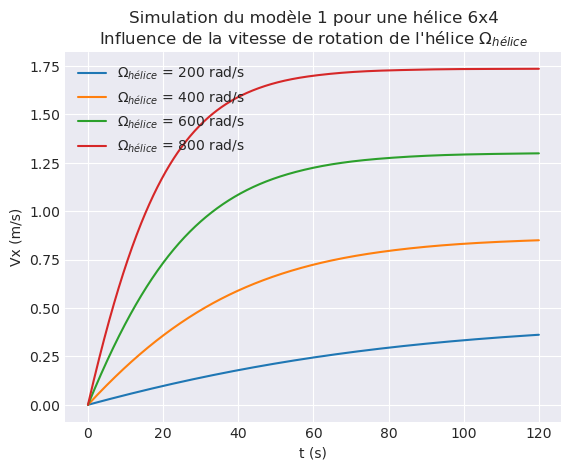

In [3]:
rapport, courbes, tableau = uas.simul_model_1_influence_vitesse_helice(
    0.0,  # date initiale de la simulation (s)
    120.0,  # date finale de la simulation (s)
    1000,  # nombre de dates de simulation
    uas.model_speed_1,  # fonction qui donne les derivées de Vx et Px
    parametres, # valeurs des paramètres
    [200, 400, 600, 800],  # valeurs du paramètre omega_helice (rad/s)
    initiale_values=[0.0, 0.0],  # vitesse (m/s), position (m)
)

In [4]:
print("Tableau des temps en secondes pour parcourir une distance donnée.")
tableau

Tableau des temps en secondes pour parcourir une distance donnée.


,pour 1 m,pour 2 m,pour 5 m,pour 10 m,pour 20 m
Ω (rad/s),,,,,
200,20.1,28.7,46.5,67.7,100.8
400,10.1,14.4,23.3,33.9,50.5
600,6.7,9.6,15.5,22.6,33.6
800,5.0,7.2,11.7,16.9,25.2


Observations sur la vitesse de rotation de l'hélice :
- dans le domaine d'utilisation étudié la vitesse maxi du dirigeable reste sensiblement proportionelle à la vitesse de rotation de l'hélice
- les effets non linéaires dûs à la trainée et au vent apparent restent négligeables
- pour parcourir 20 mètres en ligne droite avec une vitesse $V_x$ nulle au départ et à l'arrivée, il faut 10 mètres d'accélération puis 10 mètres de décélération, avec $\Omega_{hélice} = 800$ rad/s puis $\Omega_{hélice} = -800$ rad/s cela prend 17,3 + 17,3 = 34,6 secondes

### Simulation pour étudier l'influence de la géométrie de l'hélice (diamètre et pas) sur la vitesse du dirigeable

Valeurs numériques

In [5]:
parametres = uas.Parameters_model_1(
    l_dirigeable = 2.0,  # longueur de l'enveloppe ellipsoïde (m)
    r_dirigeable = 0.75,  # rayon de l'enveloppe ellipsoïde (m)
    vol_dirigeable = 3.0,  # volume de l'enveloppe (m³)
    m_dirigeable = 3.0,  # masse du dirigeable (kg)
    rho_air = 1.0,  # masse volumique de l'air (kg/m³)
    c_x = 0.05,  # coefficient aérodynamique de traînée (sans unité)
    omega_helice = 600.0,  # vitesse de rotation de l'hélice (rad/s)
)
print(parametres.deduced_param_str())

Paramètres déduits des paramètres de base
-----------------------------------------
s_reference = 1.77,  # surface de référence, paramètre déduit (m²)
m_ajoutee = 0.43,  # masse ajoutée, paramètre déduit (kg)



---> 600.0


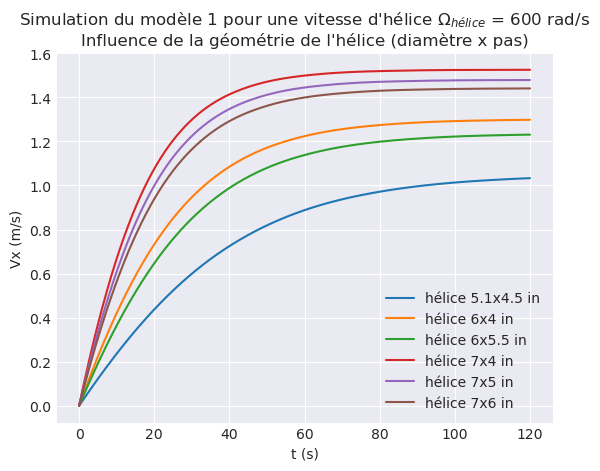

In [6]:
rapport, courbes, tableau = uas.simul_model_1_influence_geometrie_helice(
    0.0,  # date initiale de la simulation (s)
    120.0,  # date finale de la simulation (s)
    1000,  # nombre de dates de simulation
    uas.model_speed_1,  # fonction qui donne les derivées de Vx et Px
    parametres,  # valeurs des paramètres
    [
        "5.1x4.5",
        "6x4",
        "6x5.5",
        "7x4",
        "7x5",
        "7x6",
    ],  # valeurs diamètre x pas des helices (in)
    initiale_values=[0.0, 0.0],  # vitesse (m/s), position (m)
)
display(courbes)

In [7]:
print("Tableau des temps en secondes pour parcourir une distance donnée.")
tableau

Tableau des temps en secondes pour parcourir une distance donnée.


,pour 1 m,pour 2 m,pour 5 m,pour 10 m,pour 20 m
Hélice,,,,,
5.1x4.5,9.1,13.0,20.9,30.4,44.8
6x4,6.7,9.6,15.5,22.6,33.6
6x5.5,7.3,10.3,16.7,24.4,36.2
7x4,5.2,7.4,12.0,17.7,26.5
7x5,5.5,7.8,12.7,18.6,27.9
7x6,5.8,8.2,13.2,19.3,28.9


Observations sur le choix de l'hélice :
- le diamètre de l'hélice est prépondérant sur la vitesse vitesse maxi attente par le dirigeable
- à diamètre égale, les hélices à petits pas permettent d'attendre une vitesse maxi supérieure

### Simulation pour étudier l'influence de la masse du dirigeable sur sa vitesse

In [8]:
parametres = uas.Parameters_model_1(
    l_dirigeable=2.0,  # longueur de l'enveloppe ellipsoïde (m)
    r_dirigeable=0.75,  # rayon de l'enveloppe ellipsoïde (m)
    vol_dirigeable=3.0,  # volume de l'enveloppe (m³)
    m_dirigeable=3.0,  # masse du dirigeable (kg)
    rho_air=1.0,  # masse volumique de l'air (kg/m³)
    c_x=0.05,  # coefficient aérodynamique de traînée (sans unité)
    omega_helice=600.0,  # vitesse de rotation de l'hélice (rad/s)
    d_helice=6.0,  # diamètre de l'hélice (in)
    p_helice=4.0,  # pas (pitch) de l'hélice (in)
)
print(parametres.deduced_param_str())

Paramètres déduits des paramètres de base
-----------------------------------------
s_reference = 1.77,  # surface de référence, paramètre déduit (m²)
m_ajoutee = 0.43,  # masse ajoutée, paramètre déduit (kg)
alpha = 4.49e-07,  # coefficient du modèle de poussée, paramètre déduit (kg.m)
beta = 1.11e-04,  # coefficient du modèle de poussée, paramètre déduit (kg)



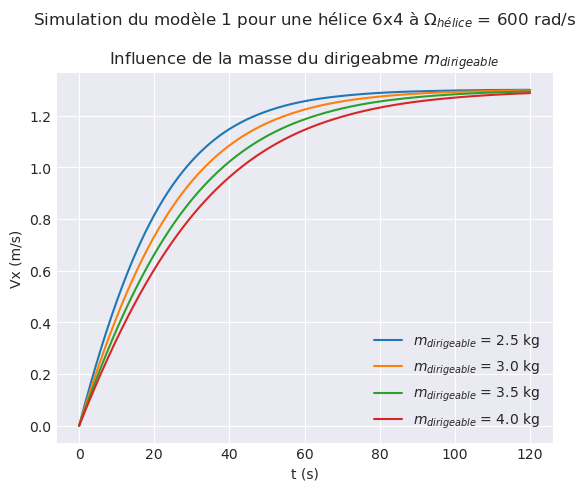

In [9]:
rapport, courbes, tableau = uas.simul_model_1_influence_masse_dirigeable(
    0.0,  # date initiale de la simulation (s)
    120.0,  # date finale de la simulation (s)
    1000,  # nombre de dates de simulation
    uas.model_speed_1,  # fonction qui donne la derivé de Vx
    parametres,  # valeurs des paramètres
    [2.5, 3.0, 3.5, 4.0],  # masse du dirigeable (kg)
)
display(courbes)

In [10]:
print("Tableau des temps en secondes pour parcourir une distance donnée.")
tableau

Tableau des temps en secondes pour parcourir une distance donnée.


,pour 1 m,pour 2 m,pour 5 m,pour 10 m,pour 20 m
masse (kg),,,,,
2.5,6.2,8.9,14.4,21.1,31.6
3.0,6.7,9.6,15.5,22.6,33.6
3.5,7.2,10.2,16.6,24.0,35.6
4.0,7.6,10.8,17.5,25.3,37.4


## Modélisation avec un modèle du moteur et de l'ESC.

Le modèle précédant de la vitesse de rotation de l'hélice était $\Gamma_{hélice} =$ constante. Dans cette section on modélise le comportement dynamique de l'hélice.

**Système isolé**

- le rotor moteur (hypothèse l'hélice est en liaison complète avec l'arbre d'hélice qui est aussi le rotor du moteur électrique)

**Inventaires des actions mécaniques sur le système isolé (arbre moteur)**

- couple moteur
- couple résistant au niveau de l'hélice
- couple de frottement dans la liaison pivot arbre_moteur/dirigeable

**Modélisation de la projection des couples mécaniques selon l'axe de rotation de l'arbre moteur**

*Modélisation du couple à l'hélice* $\Gamma_{hélice}$

Lien entre l'effort de propulsion $F_{prop}$ et le couple de l'air sur l'hélice $\Gamma_{hélice}$ est obtenue par l'expression de la puissance propulsive.

Puissance propulsive = $F_{prop}.V_x = \eta \Gamma_{hélice}.\Omega_{hélice}$ où $\eta$ est un rendement.

on à donc le modèle du couple de l'air sur l'hélice

$$
\begin{array}{rcl}
\Gamma_{hélice} &=& \frac{V_x}{\eta \Omega_{hélice}} F_{prop} \\
 &=& \frac{V_x}{\eta \Omega_{hélice}} (\alpha\Omega_{hélice}^2 - \beta\Omega_{hélice}.V_x) \\
 &=& \frac{\alpha}{\eta} V_x \Omega_{hélice} - \frac{\beta}{\eta} V_x^2
\end{array}
$$


**Modélisation du moteur** (comme pour un moteur à courant continu et aimant permanent)

$$
\begin{array}{rcl}
    U_{moteur} &=& R_m I_{moteur} + L_m\frac{dI_{moteur}}{dt} + K_e \Omega_{moteur} \\
    \Gamma_{moteur} &=& K_c I_{moteur}
\end{array}
$$

où

- $\Omega_{moteur}$ est la vitesse de rotation du rotor moteur en liaison complète avex l'hélice, on à donc $\Omega_{moteur} = \Omega_{hélice}$
- $I_{moteur}$ est le courant qui traverse le moteur
- $U_{alim}$ est la tension d'alimentation du moteur
- $R_m$ la résistance interne du moteur
- $L_m$ l'inductance interne du moteur
- $K_e$ la constante de la force électromotrice
- $\Gamma_{moteur}$ couple moteur (couple électromagnétique)
- $K_c$ la constante de couple du moteur

**Modélisation de rampe de vitesse de l'ESC**

L'ESC répond à une demande d'échelon par un une droite de pente $\pm U_{alim}/t_{montée}$ jusqu'à obtenir la vitesse demandée.

$$
U_{moteur}(t) = \left \{
  \begin{array}{lcrcccl}
    U_{moteur}(0) & si & && t &<& 0 \\
    U_{moteur}(0) \pm \frac{U_{alim}}{t_{montée}} . t & si & 0 &\le& t &<& \frac{t_{montée}}{U_{alim}}.|U_{consigne}-U_{moteur}(0)| \\
    U_{consigne}  & si &\frac{t_{montée}}{U_{alim}}.|U_{consigne}-U_{moteur}(0)| &<& t\\
  \end{array}
\right.
$$

avec
- $U_{alim}$ est la tension d'alimentation de l'ESC (V)
- $U_{consigne}$ est la tension visée pour le moteur (V)
- $t_{montée}$ la durée de montée de la rampe de vitesse de l'ESC (s)
  pour passer la tension $U_{moteur}$ 0 à 100% de $U_{alim}$




**Principe fondamental du moment dynamique appliquée à l'arbre moteur**

$$
(J_{moteur} + J_{hélice})\frac{d\Omega_{hélice}}{dt} = \Gamma_{moteur} - \Gamma_{hélice} - f.\Omega_{hélice}
$$

où 
- $J_{moteur}$ moment d'inertie du rotor du moteur
- $J_{hélice}$ moment d'inertie du rotor du moteur
- $f$ coefficient de frottement visqueux (N.m/(rad/s))

### Modèle 2 de la vitesse du dirigeable incluant l'ESC et le moteur

L'accouplement est direct entre l'arbre moteur et l'hélice, on à donc $\Omega_{moteur} = \Omega_{hélice}$

$$
\left\{
    \begin{array}{ccl}
        \frac{dV_x(t)}{dt} &=& - \frac{\rho_{air} S_{ref} C_x}{2(m_{dirigeable} + m_{ajoutée})}V_x(t)^2  - \frac{\beta\Omega_{hélice}(t)}{m_{dirigeable} + m_{ajoutée}}V_x(t) + \frac{\alpha}{m_{dirigeable} + m_{ajoutée}}\Omega_{hélice}(t)^2 \\
        \frac{dP_x(t)}{dt} &=& V_x(t) \\
        \frac{d\Omega_{hélice}(t)}{dt} &=& \frac{K_c}{J_{moteur} + J_{hélice}} I_{moteur}(t) - \frac{\alpha}{\eta(J_{moteur} + J_{hélice})} V_x(t) \Omega_{hélice}(t) + \frac{\beta}{\eta(J_{moteur} + J_{hélice})} V_x(t)^2 \\ 
        \frac{dI_{moteur}(t)}{dt} &=& \frac{1}{L_m}U_{moteur}(t) - \frac{R_m}{L_m} I_{moteur}(t) - \frac{K_e}{L_m} \Omega_{hélice}(t)
    \end{array}
\right. \;\;\;\;\;\; (2)
$$

avec 

$$
U_{moteur}(t) = \left \{
  \begin{array}{lcrcccl}
    U_{moteur}(0) & si & && t &<& 0 \\
    U_{moteur}(0) \pm \frac{U_{alim}}{t_{montée}} . t & si & 0 &\le& t &<& \frac{t_{montée}}{U_{alim}}.|U_{consigne}-U_{moteur}(0)| \\
    U_{consigne}  & si &\frac{t_{montée}}{U_{alim}}.|U_{consigne}-U_{moteur}(0)| &<& t\\
  \end{array}
\right.
$$

Le système de 3 équations différentielles ordinaires $(2)$ donne l'évolution temporelle des variables
- $V_x(t)$ la vitesse longitudinale du dirigeable
- $P_x(t)$ la position longitudinale du dirigeable
- $\Omega_{hélice}(t)$ la vitesse de rotation de l'hélice
- $I_{moteur}(t)$ le courant qui traverse le moteur

en fonction les paramètres suivants
- $l_{dirigeable}$ la longueur de l'enveloppe ellipsoïde du dirigeable (m)
- $r_{dirigeable}$ le rayon de l'enveloppe ellipsoïde du dirigeable (m)
- $V_{dirigeable/air}$ le volume de l'enveloppe du dirigeable (m³)
- $m_{air}$ la masse du dirigeable, enveloppe et nacelle (kg)
- $\rho_{air}$ la masse volumique de l'air  (kg/m³)
- $C_x$ le coefficient aérodynamique de trainée (sans unité)
- $d_{hélice}$ le diamètre de l'hélice (in)
- $p_{hélice}$ le pas (pitch) de l'hélice (in)
- $J_{hélice}$ moment d'inertie du rotor du moteur (kg.m²)
- $J_{moteur}$ moment d'inertie du rotor du moteur (kg.m²)
- $f$ coefficient de frottement visqueux (N.m/(rad/s))
- $K_m$ la constante moteur (rpm/V)
- $R_m$ la résistance interne du moteur ($\Omega$)
- $L_m$ l'inductance interne du moteur (H)
- $U_{alim}$ est la tension d'alimentation de l'ESC (V)
- $U_{consigne}$ est la tension visée pour le moteur (V)
- $t_{montée}$ la durée de montée de la rampe de vitesse de l'ESC (s)
  pour passer la tension $U_{moteur}$ 0 à 100% de $U_{alim}$


et des paramètres suivants construits à partir des précédants
- $S_{ref} = \pi.r_{dirigeable}^2$ la surface de référence pour la trainée (m²)
- $m_{ajoutée} = m_{air} \frac{\alpha_0}{2-\alpha_0}$ la masse ajoutée pour tenir compte des efforts aérodynamiques non stationnaires (kg) où 
  - $\alpha_0 = \frac{2(1-e^2)}{e^3} ( \frac{1}{2} ln ( \frac{1+e}{1-e} ) - e )$ et 
  - $e^2 = 1 - \frac{r_{dirigeable}^2}{(l_{dirigeable}  / 2)^2}$
- $\alpha = 1.6956 \times 10^{-9} \times d_{hélice}^{3.5} / \sqrt{p_{hélice}}$ un coefficient du modèle de poussée (kg.m)
- $\beta = 4.1944 \times 10^{-7} \times d_{hélice}^{3.5} / \sqrt{p_{hélice}}$ un coefficient du modèle de poussée (kg)
- $K_e = 60 / 2 \pi K_m$ la constante de la force électromotrice du moteur (V.s.rad⁻¹)
- $K_c = K_e$ la constante de couple du moteur (A.N⁻¹.m⁻¹)

Valeurs numériques

Moteur: Robbe 2710 1530 KV Brushless Motor ([doc](https://www.lindinger.at/media/33/d1/00/1649756853/9759886_DE_RO-Power_Torque-Anleitung-Manual-Manuel_DE-EN-FR.pdf))

- $m_{moteur}$ = 15 g
- $K_m$ = 1530 rpm/V
- $R_m$ = 0,237 $\Omega$
- $J_{moteur}$ = ?? estimée à $2$ g.cm² ([source](https://www.faulhaber.com/fileadmin/Import/Media/FR_2214_BXTH_DFF.pdf))
- $L_m$ = ?? estimée à 0,1 mH ([source](https://www.faulhaber.com/fileadmin/Import/Media/FR_2214_BXTH_DFF.pdf))
- $f$ = ?? estimé à $10^{-3}$ N.m/(rad/s)

<img src="https://www.modelheliservices.com/cdn/shop/products/9759886_grande.jpg?v=1624911984" width="120"/>

Contrôleur de vitesse (ESC): Robbe Modellsport RO-CONTROL 4-40 V2 3-4S -40(60)A 5V/3A B Régulateur SWITCH BEC (lien [site](https://www.robbe.com/fr/Electroniques-RC/Propulsions/Controleurs/Robbe-Modellsport-RO-CONTROL-4-40-V2-3-4S-40-60-A-5V-3A-B-Regulateur-SWITCH-BEC/8739), lien [manuel](https://www.robbe.com/media/d5/33/b4/1700641881/9796914_FR_Manuel.pdf)) 

- $t_{montée}$ = 0,5 s (mode doux, voir manuel)
- $m_{ESC}$ = 10 g

<img src="https://www.robbe.com/thumbnail/de/b9/7a/1706272632/9796914_400x400.jpg" width="240"/>

Batterie : Bloc batterie rechargeable RS PRO 14.4V Lithium-Ion 3.5Ah x 4 ([lien](https://fr.rs-online.com/web/p/blocs-batteries-rechargeables/2602990))

- $U_{alim}$ = 14,4 V
- $m_{alim}$ = 0,195 kg

<img src="https://res.cloudinary.com/rsc/image/upload/bo_1.5px_solid_white,b_auto,c_pad,dpr_2,f_auto,h_399,q_auto,w_710/c_pad,h_399,w_710/F1449416-01?pgw=1" width="360"/>"


Hélice APC 7x5

- diamètre = 7'
- pas = 5'
- épaisseur du centre = 0,38' 
- $m_{hélice}$ = 11,1 g
- $J_{hélice}$ = ?? estimée à $2.10^{-6}$ kg.m²

<img src="https://www.abt-modelisme.com/143117-large_default/ap-07050-apc-helice-sport-epgp-7x5.jpg" width="240"/>

### Simulation du modèle 2 pour estimation du courant moteur $I_{moteur}$

In [11]:
parametres = uas.Parameters_model_2(
    l_dirigeable=2.0,  # longueur de l'enveloppe ellipsoïde (m)
    r_dirigeable=0.75,  # rayon de l'enveloppe ellipsoïde (m)
    vol_dirigeable=3.0,  # volume de l'enveloppe (m³)
    m_dirigeable=3.0,  # masse du dirigeable (kg)
    rho_air=1.0,  # masse volumique de l'air (kg/m³)
    c_x=0.05,  # coefficient aérodynamique de traînée (sans unité)
    d_helice=6.0,  # diamètre de l'hélice (in)
    p_helice=4.0,  # pas (pitch) de l'hélice (in)
    eta=0.75,  # rendement de l'hélice (sans unité)
    j_helice=3e-6,  # moment d'inertie de l'hélice (kg.m²)
    j_moteur=2e-6,  # moment d'inertie du rotor du moteur (kg.m²)
    f=1e-3,  # frottement au niveau du moteur (N.m/(rad/s))
    k_m=1530,  # constante moteur (rpm/s)
    r_m=0.25,  # résistance du moteur (Ω)
    l_m=0.1e-3,  # inductance du moteur (H)
    u_alim=14.4,  # tension l'alimentation de l'ESC (V)
    t_montee=0.5,  # durée de montée de la rampe de vitesse ESC (s)
)
print(parametres.deduced_param_str())

Paramètres déduits des paramètres de base
-----------------------------------------
s_reference = 1.77,  # surface de référence, paramètre déduit (m²)
m_ajoutee = 0.43,  # masse ajoutée, paramètre déduit (kg)
alpha = 4.49e-07,  # coefficient du modèle de poussée, paramètre déduit (kg.m)
beta = 1.11e-04,  # coefficient du modèle de poussée, paramètre déduit (kg)
k_e = 6.24e-03,  # constant de f.e.m. du moteur (V.s.rad⁻¹)
k_c = 6.24e-03,  # constante de couple du moteur (A.N⁻¹.m⁻¹)



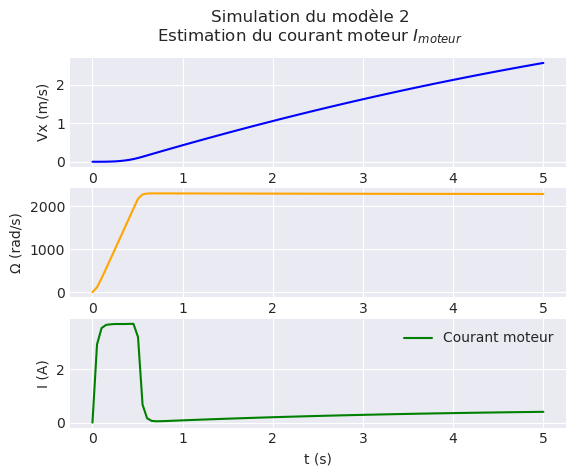

In [12]:
rapport, courbes = uas.simul_model_2_simulation(
    0.0,  # date initiale de la simulation (s)
    5.0,  # date finale de la simulation (s)
    100,  # nombre de dates de simulation
    uas.model_speed_2,  # fonction qui donne la derivé de Vx
    parametres,  # valeurs des paramètres
    initiale_values=[0.0, 0.0, 0.0, 0.0],  # Vx, Px, Ω, Imot initiales
)
display(courbes)

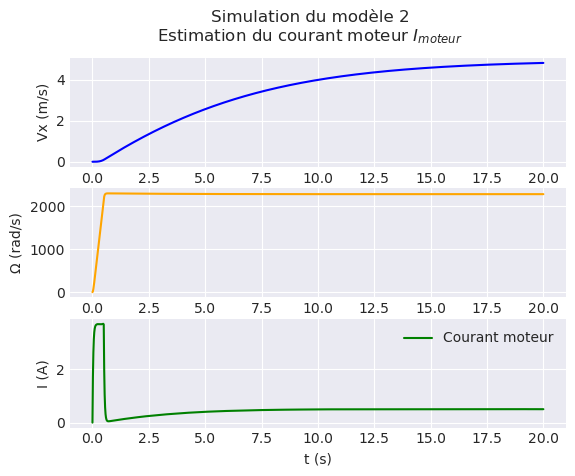

In [13]:
rapport, courbes = uas.simul_model_2_simulation(
    0.0,  # date initiale de la simulation (s)
    20.0,  # date finale de la simulation (s)
    1000,  # nombre de dates de simulation
    uas.model_speed_2,  # fonction qui donne la derivé de Vx
    parametres,  # valeurs des paramètres
    initiale_values=[0.0, 0.0, 0.0, 0.0],  # Vx, Px, Ω, Imot initiales
)
display(courbes)

## Références

[Bestaoui 2012] Y. Bestaoui Sebbane, Lighter than Air Robots, Guidance and Control of Autonomous Airships, vol. 58. in Intelligent Systems, Control and Automation: Science and Engineering, vol. 58. Dordrecht: Springer Netherlands, 2012. doi: 10.1007/978-94-007-2663-5.

[Parrington 2021] P. Parrington, “Introduction Technique Aux Dirigeables,” 2021.

[Rochez 2020] J. Rochez, De l’hélice à la batterie V2, 2e édition. 2020. https://www.coollibri.com/bibliotheque-en-ligne/jacques-rochez/de-lhelice-a-la-batterie-v2_95773

[Staple 2013] Gabriel Staples, Propeller Static & Dynamic Thrust Calculation, 2013 https://www.electricrcaircraftguy.com/2013/09/propeller-static-dynamic-thrust-equation.html
